<h1>Distinguishing Sentiments</h1>

![](Twitter.jpg)

<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. Setup Tweepy API Authentication
4. Use Twitter API to obtain tweets for Media Sources
5. Generated dataframe containing sentiment for Media Sources
6. Save df_sentiment_analysis as a csv titled, 'Sentiment_analyzer_Twitter.csv'
7. Generated dataframes for all media sources
8. Plot of Sentiment Analysis for Media Tweets
9. Generated Overall Media Sentiment based on Twitter table
10. Plot of Overall Media Sentiment Analysis
11. Generated average sentiment scores dataframe
12. Relationship Plot for Polarity Scores
13. Conclusion

<h3><u>Instructions</u></h3>

*In* this project, the goal is to create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets and to present your findings visually.

<h3><u>Import libraries</u></h3>

In [1]:
!pip install tweepy
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import numpy as np
import seaborn as sns
#from my_keys import *
import warnings
warnings.filterwarnings('ignore')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 133kB 4.5MB/s 


<h3><u>Setup Tweepy API Authentication</u></h3>

In [2]:
# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

<h3><u>Use Twitter API to obtain tweets for Media Sources</u></h3>

In [3]:
#Sentiment Intensitiy Analyzer
analyzer = SentimentIntensityAnalyzer()

#Target Account for each Media Source
target_user = ["@BBC","@CBS","@Fox","@CNN","@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
   
    #loop through each Media Source
    for target in target_user:
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target)
             

        # Loop through all tweets 
        for tweet in public_tweets:
            
            
        # Run vaderSentiment on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
           
        
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Screen_Name": tweet['user']['screen_name'],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})                     

<h3><u>Generated dataframe containing sentiment for Media Sources</u></h3>

In [4]:
#Generated dataframe containing sentiment for Media Sources
df_sentiment_analysis= pd.DataFrame(sentiments) 

#display head of df_sentiment_analysis 
df_sentiment_analysis.head()

,Date,Screen_Name,Compound,Positive,Negative,Neutral
0,Thu Aug 27 16:01:00 +0000 2020,BBC,0.0000,0.000,1.000,0.000
1,Wed Aug 26 13:30:15 +0000 2020,BBC,0.0000,0.000,1.000,0.000
2,Wed Aug 26 11:00:20 +0000 2020,BBC,0.4199,0.141,0.859,0.000
3,Tue Aug 25 16:01:00 +0000 2020,BBC,0.0000,0.000,1.000,0.000
4,Tue Aug 25 15:34:58 +0000 2020,BBC,-0.3612,0.000,0.902,0.098


<h3><u>Save df_sentiment_analysis as a csv titled, 'Sentiment_analyzer_Twitter.csv'</u></h3>

In [5]:
#Save df_sentiment_analysis as a csv titled, 'Sentiment_analyzer_Twitter.csv'.
df_sentiment_analysis.to_csv('Sentiment_analyzer_Twitter.csv',index=False)

<h3><u>Generated dataframes for all media sources</u></h3>

In [6]:
#Generated dataframes for all the media sources
df_BBC = df_sentiment_analysis[df_sentiment_analysis['Screen_Name'] == 'BBC']
df_CBS = df_sentiment_analysis[df_sentiment_analysis['Screen_Name'] == 'CBS']
df_fox = df_sentiment_analysis[df_sentiment_analysis['Screen_Name'] == 'fox']
df_CNN = df_sentiment_analysis[df_sentiment_analysis['Screen_Name'] == 'CNN']
df_nytimes = df_sentiment_analysis[df_sentiment_analysis['Screen_Name'] == 'nytimes']

<h3><u>Plot of Sentiment Analysis for Media Tweets</u></h3>

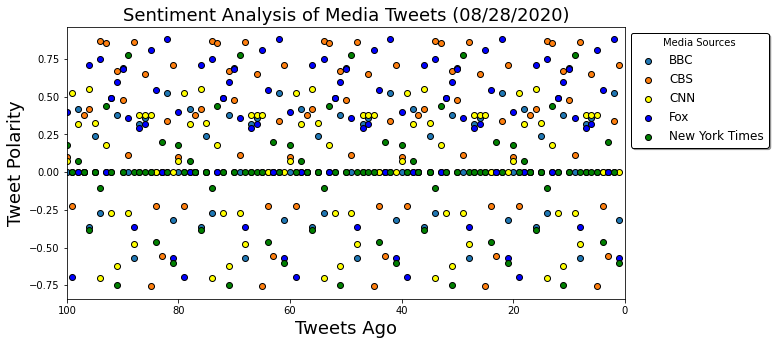

In [7]:
#Plot of Sentiment Analysis of Media Tweets
x_values = np.arange(1,df_BBC.shape[0]+1)


plt.figure(figsize=(10,5))
plt.scatter(x_values[::-1],df_BBC['Compound'],edgecolors='black',label='BBC')


plt.scatter(x_values[::-1],df_CBS['Compound'],edgecolors='black',label = 'CBS')
plt.scatter(x_values[::-1],df_CNN['Compound'],edgecolors='black',color='yellow',label='CNN')
plt.scatter(x_values[::-1],df_fox['Compound'],edgecolors='black',color='b',label='Fox')
plt.scatter(x_values[::-1],df_nytimes['Compound'],edgecolors='black',color='green',label='New York Times')

plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlim(0,100)
plt.xlabel('Tweets Ago',fontsize='18')
plt.ylabel('Tweet Polarity',fontsize='18')

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(18))

plt.xlim(100,0);

<h3><u>Generated Overall Media Sentiment based on Twitter table</u></h3>

In [8]:
#Overall Media Sentiment based on Twitter table
df_sentiment_analysis_avg_compound = df_sentiment_analysis.groupby(["Screen_Name"])["Compound"].mean().reset_index()


#rename the columns in df_sentiment_analysis_avg_compound dataframe 
df_sentiment_analysis_avg_compound.rename({'Screen_Name': 'Media Sources','Compound':  'Avg. Compound'},axis=1,inplace=True)

#plot bars in df_sentiment_analysis_avg_compound dataframe
df_sentiment_analysis_avg_compound.style.bar(subset=['Avg. Compound'], align='mid', color=['blue', 'red'])

,Media Sources,Avg. Compound
0,BBC,0.070795
1,CBS,0.258880
2,CNN,0.038745
3,fox,0.261175
4,nytimes,-0.030990


<h3><u>Plot of Overall Media Sentiment Analysis</u></h3>

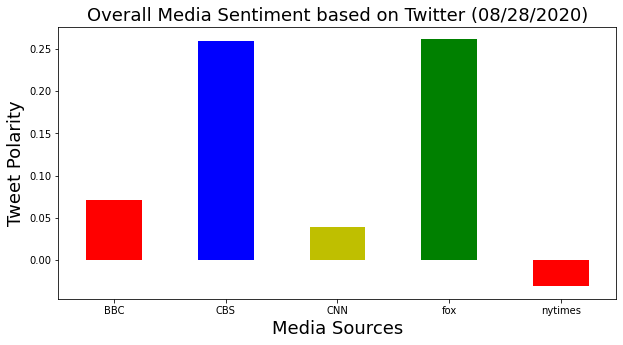

In [9]:
#Plot of overall Media Sentiment Analysis
plt.figure(figsize=(10,5))
df_sentiment_analysis.groupby(["Screen_Name"])["Compound"].mean().plot(kind='bar',color=['r','b','y','g'])

plt.ylabel('Tweet Polarity',fontsize='18')
plt.xlabel('Media Sources',fontsize='18')
plt.xticks(rotation=0)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Twitter ({})'.format(now),fontsize=(18));


<h3><u>Generated average sentiment scores dataframe</u></h3>

In [10]:
df_sentiment_analysis_avg_neg = df_sentiment_analysis.groupby(['Screen_Name'])['Negative'].mean().reset_index()
df_sentiment_analysis_avg_neg.rename({'Screen_Name': 'Media Sources',
                                              'Negative':'Avg. Negative'},axis=1,inplace=True)

df_sentiment_analysis_avg_pos = df_sentiment_analysis.groupby(['Screen_Name'])['Positive'].mean().reset_index()
df_sentiment_analysis_avg_pos.rename({'Screen_Name': 'Media Sources',
                                              'Positive': 'Avg. Positive'},axis=1,inplace=True)

df_sentiment_analysis_avg_neu = df_sentiment_analysis.groupby(['Screen_Name'])['Neutral'].mean().reset_index()
df_sentiment_analysis_avg_neu.rename({'Screen_Name': 'Media Sources',
                                              'Neutral' :'Avg. Neutral'},axis=1,inplace=True)

In [11]:
df_avg_sentiment_neg_pos = df_sentiment_analysis_avg_neg.merge(df_sentiment_analysis_avg_pos,how='outer',on='Media Sources')
df_avg_sentiment_neg_pos_neu = df_avg_sentiment_neg_pos.merge(df_sentiment_analysis_avg_neu,how='outer',on='Media Sources')
df_avg_sentiment_neg_pos_neu_compound = df_avg_sentiment_neg_pos_neu.merge(df_sentiment_analysis_avg_compound,how='outer',on='Media Sources')

#Display table
df_avg_sentiment_neg_pos_neu_compound

,Media Sources,Avg. Negative,Avg. Positive,Avg. Neutral,Avg. Compound
0,BBC,0.90060,0.05785,0.04160,0.070795
1,CBS,0.82575,0.13420,0.04010,0.258880
2,CNN,0.90230,0.05285,0.04485,0.038745
3,fox,0.82615,0.12790,0.04595,0.261175
4,nytimes,0.91990,0.03120,0.04890,-0.030990


In [12]:
df_sentiment_analysis_neg_neu_pos = df_sentiment_analysis[['Negative', 'Neutral', 'Positive', 'Screen_Name']]
df_sentiment_analysis_neg_neu_pos.rename({'Screen_Name':'Media Sources'},axis= 1,inplace=True)

<h3><u>Relationship Plot for Polarity Scores</u></h3>

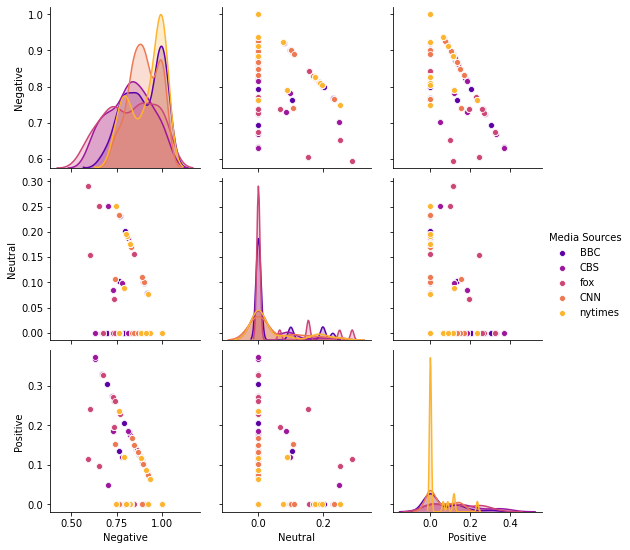

In [14]:
sns.pairplot(df_sentiment_analysis_neg_neu_pos,hue='Media Sources',palette='plasma');
#sns.pairplot(df_sentiment_analysis_neg_neu_pos,palette='plasma')

<h3><u>Conclusion</u></h3>
<p>While performing a sentiment analysis for Tweets from various news outlets, I noticed a few different insights. The insights are below: </p>
<h4><u>Insights</u></h4>
<ul>
<li>In the Correlation Plot for Polarity Scores, there is a correlation between positive and negative polarities. As the positivity decreased the negative polarities increased for each media source. </li> 
<p><li>In the Overall Media Sentiment Analysis Plot, NYtimes appears to have more negative compound tweets.
 </li><br>
<li>CBS has the highest positive polarity scores when compared to all other media sources.</li>
</ul>